In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


df1 = pd.read_csv("data_2018.csv")
df2 = pd.read_csv("data_2019.csv")
df3 = pd.read_csv("data_2020.csv")

df1.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,E.C,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,5.09,postmonsoon 2018,8.28,745,...,46.0,49.0,4.0,48,38.896,279.934211,1.273328,C2S1,-1.198684,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,5.10,postmonsoon 2018,8.29,921,...,68.0,42.0,5.0,56,63.206,399.893092,0.913166,C3S1,-3.397862,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.98,postmonsoon 2018,7.69,510,...,44.0,45.0,2.0,24,38.896,219.934211,1.319284,C2S1,-0.398684,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,5.75,postmonsoon 2018,8.09,422,...,35.0,27.0,1.0,32,19.448,159.967105,0.928155,C2S1,0.000658,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,postmonsoon 2018,8.21,2321,...,280.0,298.0,5.0,56,92.378,519.843750,5.682664,C4S2,-4.396875,P.S.


In [4]:
df2.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,pH,EC,...,SO4-2,Na+,K+,Ca+2,Mg+2,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,6.45,post monsoon 2019,8.32,2355,...,377.0,273.0,113.0,80.0,82.654,539.860197,5.108509,C4S2,-3.797204,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,3.85,post monsoon 2019,8.30,565,...,52.0,89.0,14.0,48.0,4.862,139.991776,3.196982,C2S1,1.200164,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,4.45,post monsoon 2019,8.12,766,...,43.0,39.0,10.0,40.0,24.310,199.958882,1.199130,C3S1,-0.199178,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,3.95,post monsoon 2019,7.09,555,...,31.0,40.0,5.0,40.0,24.310,199.958882,1.229877,C2S1,0.400822,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,2.15,post monsoon 2019,7.97,735,...,28.0,44.0,16.0,72.0,34.034,319.942434,0.996598,C2S1,0.401151,P.S.


In [5]:
df3.head()

,sno,district,mandal,village,lat_gis,long_gis,gwl,season,Unnamed: 8,pH,...,SO4,Na,K,Ca,Mg,T.H,SAR,Classification,RSC meq / L,Classification.1
0,1,ADILABAD,Adilabad,Adilabad,19.668300,78.524700,7.10,Post-monsoon 2020,NaN,8.01,...,33.00,171.0,9.0,24.0,72.930,359.876645,3.919146,C3S1,0.602467,P.S.
1,2,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,3.35,Post-monsoon 2020,NaN,7.77,...,13.50,70.0,3.0,16.0,53.482,259.909539,1.887814,C3S1,-0.198191,P.S.
2,3,ADILABAD,Gudihatnoor,Gudihatnoor,19.525555,78.512222,5.05,Post-monsoon 2020,NaN,8.21,...,10.50,65.0,3.0,16.0,48.620,239.917763,1.824544,C2S1,0.001645,P.S.
3,4,ADILABAD,Jainath,Jainath,19.730555,78.640000,2.10,Post-monsoon 2020,NaN,8.3,...,7.25,31.0,1.0,16.0,29.172,159.950658,1.065714,C2S1,-0.199013,P.S.
4,5,ADILABAD,Narnoor,Narnoor,19.495665,78.852654,1.38,Post-monsoon 2020,NaN,7.67,...,14.50,129.0,2.0,32.0,5.000,82.878289,6.160862,C2S1,3.742434,U.S.


Suppresion de la colonne vide du df3

In [6]:
df3 = df3.dropna(axis=1, how='all')

Renommer les colonnes pour qu'elles aient toute le même nom

In [7]:
print(df1.columns.tolist())
print(df2.columns.tolist())
print(df3.columns.tolist())


['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl', 'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L', 'Classification.1']
['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl', 'season', 'pH', 'EC', 'TDS', 'CO_-2 ', 'HCO_ - ', 'Cl -', 'F -', 'NO3- ', 'SO4-2', 'Na+', 'K+', 'Ca+2', 'Mg+2', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L', 'Classification.1']
['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl', 'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L', 'Classification.1']


In [8]:
df2.rename(columns={'EC': 'E.C'}, inplace=True)
df2.rename(columns={'CO_-2 ': 'CO3'}, inplace=True)
df2.rename(columns={'HCO_ - ': 'HCO3'}, inplace=True)
df2.rename(columns={'Cl -': 'Cl'}, inplace=True)
df2.rename(columns={'F -': 'F'}, inplace=True)
df2.rename(columns={'NO3- ': 'NO3 '}, inplace=True)
df2.rename(columns={'SO4-2': 'SO4'}, inplace=True)
df2.rename(columns={'Na+': 'Na'}, inplace=True)
df2.rename(columns={'K+': 'K'}, inplace=True)
df2.rename(columns={'Ca+2': 'Ca'}, inplace=True)
df2.rename(columns={'Mg+2': 'Mg'}, inplace=True)

print(df1.columns.tolist())
print(df2.columns.tolist())
print(df3.columns.tolist())


['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl', 'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L', 'Classification.1']
['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl', 'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L', 'Classification.1']
['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl', 'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L', 'Classification.1']


Fusion des 3 csv

In [9]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.to_csv("data_fusion.csv", index=False)
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               1106 non-null   int64  
 1   district          1106 non-null   object 
 2   mandal            1106 non-null   object 
 3   village           1106 non-null   object 
 4   lat_gis           1106 non-null   float64
 5   long_gis          1106 non-null   float64
 6   gwl               1095 non-null   float64
 7   season            1106 non-null   object 
 8   pH                1106 non-null   object 
 9   E.C               1106 non-null   int64  
 10  TDS               1106 non-null   float64
 11  CO3               946 non-null    float64
 12  HCO3              1106 non-null   float64
 13  Cl                1106 non-null   int64  
 14  F                 1106 non-null   float64
 15  NO3               1106 non-null   float64
 16  SO4               1106 non-null   float64


Drop des quelques colonnes évidentes à drop

<Axes: >

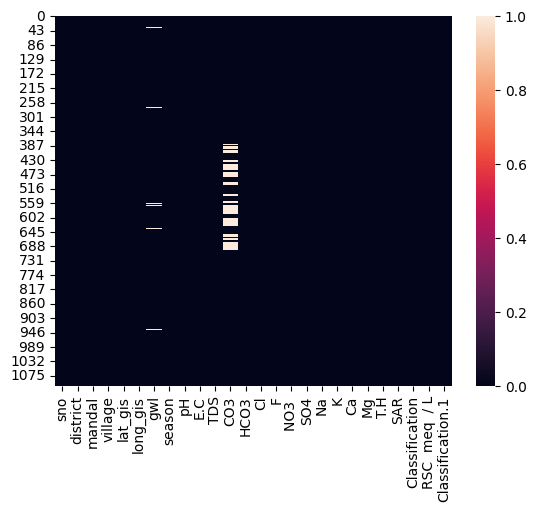

In [10]:
sns.heatmap(df.isna())

Vérification du nombre de données manquante

In [11]:
df["gwl"].isna().sum()/df.shape[0]

0.009945750452079566

In [12]:
df["CO3"].isna().sum()/df.shape[0]

0.14466546112115733

In [13]:
#Suppresion de la colonne CO3 car il y a + de 10% de données manquante
df.drop("CO3", axis=1, inplace=True)
#Suppresion de la colonne sno car c'est une colonne d'index
df.drop("sno", axis=1, inplace=True)

In [14]:
#Drop des éventuels doublons
df.drop_duplicates(inplace=True)

Modification de la target

In [15]:
changement = {
    'C2S1': 'Moderate',
    'C3S1': 'Poor',
    'C4S2': 'Bad',
    'C4S1': 'Bad',
    'C3S2': 'Poor',
    'C4S4': 'Bad',
    'C4S3': 'Bad',
    'C1S1': 'Good',
    'C3S4': 'Bad',
    'C3S3': 'Poor',
    'C2S2': 'Moderate'
}

df['Classification'].replace(changement, inplace=True)

target = ['Moderate', 'Poor', 'Bad', 'Good']
df_filtre = df[df['Classification'].isin(target)]

Verification du changement 

In [16]:
df_filtre["Classification"].unique()


array(['Moderate', 'Poor', 'Bad', 'Good'], dtype=object)

In [17]:
df = df_filtre

Suppression des colonnes Object

In [18]:
df.drop("district", axis=1, inplace=True)
df.drop("village", axis=1, inplace=True)
df.drop("mandal", axis=1, inplace=True)
df.drop("season", axis=1, inplace=True)
df.drop("pH", axis=1, inplace=True)
df.drop("Classification.1", axis=1, inplace=True)

Encodage de la colonne Classification pour la matrice de corrélation

In [19]:
encoder = LabelEncoder()
df["Classification"] = encoder.fit_transform(df["Classification"])

Calcul de la matrice de corrélation

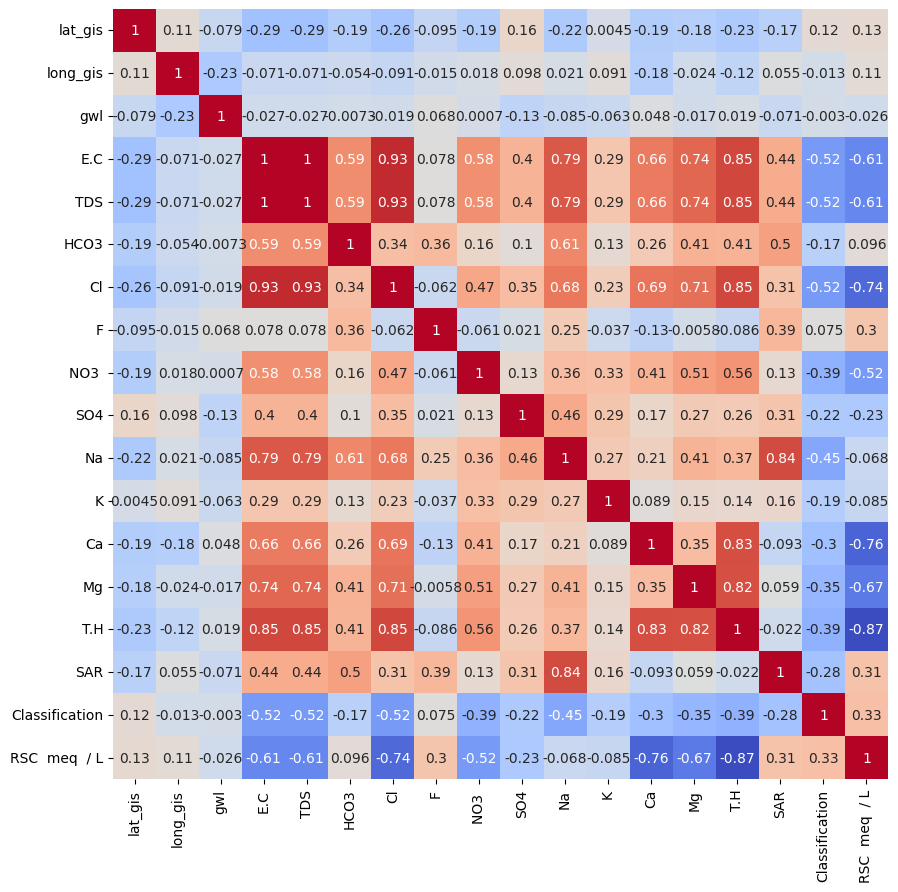

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='coolwarm')
plt.show()

Désencodage pour enregistrer un nouveau csv propre avec la colonne Classification non encodé

In [21]:
df["Classification"] = encoder.inverse_transform(df["Classification"])

Choix des 10 meilleures colonnes

In [22]:
colonnes_choisies = ['E.C', 'TDS', 'Cl','NO3 ','Na', 'T.H','Mg','SAR',"Ca","K",'Classification']
df = df[colonnes_choisies]
df.to_csv("data_10features.csv", index=False)

In [23]:
df = pd.read_csv("data_10features.csv")

Re-encodage pour les futurs calculs

In [24]:
encoder = LabelEncoder()
df["Classification"] = encoder.fit_transform(df["Classification"])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   E.C             1102 non-null   int64  
 1   TDS             1102 non-null   float64
 2   Cl              1102 non-null   int64  
 3   NO3             1102 non-null   float64
 4   Na              1102 non-null   float64
 5   T.H             1102 non-null   float64
 6   Mg              1102 non-null   float64
 7   SAR             1102 non-null   float64
 8   Ca              1102 non-null   float64
 9   K               1102 non-null   float64
 10  Classification  1102 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 94.8 KB


Conversion de toute les colonnes en float, pour éviter des erreurs

In [26]:
df = df.astype(float)


Affichage des outliers

<Axes: >

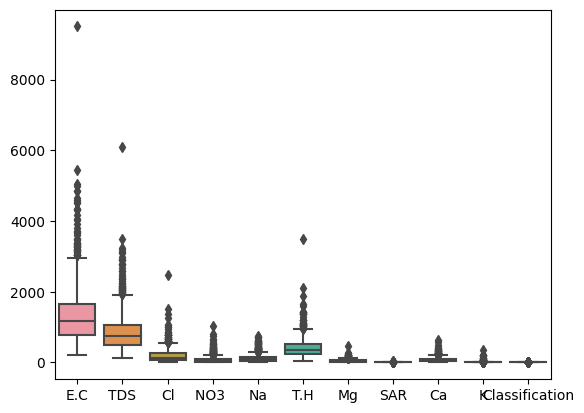

In [27]:
sns.boxplot(df)

On ramène les outliers à la borne supérieure

In [28]:
colonnes_a_traiter = ['E.C', 'TDS', 'Cl','NO3 ','Na', 'T.H','Mg',"Ca","K"]

marge = 1.5

for i in colonnes_a_traiter:
    Q3 = np.percentile(df[i], 75)  # Troisième quartile de la colonne
    Q1 = np.percentile(df[i], 25)  # Premier quartile de la colonne
    limite_superieure = Q3 + marge * (Q3 - Q1)
    df[i][df[i] > limite_superieure] = limite_superieure

Vérification

<Axes: >

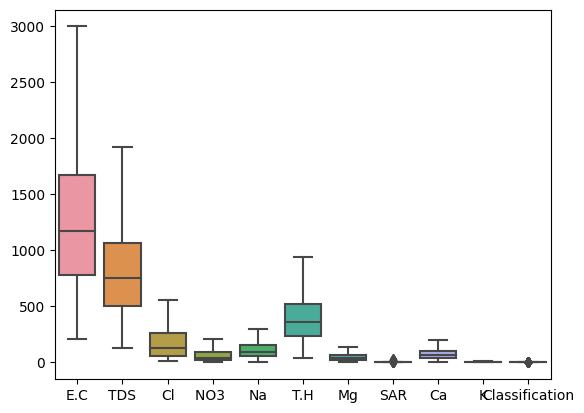

In [29]:
sns.boxplot(df)

In [30]:
X = df.iloc[:, :-1] 
y = df["Classification"]

kf = KFold(n_splits=5, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

score_knn_5 = []
score_knn_15 = []
score_svm_linear = []
score_svm_rbf = []
score_decision_tree_best = []
score_decision_tree_random = []
score_random_forest_50 = []
score_random_forest_100 = []
score_xgboost_50 = []
score_xgboost_100 = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn= KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_knn_5.append((accuracy, precision, fscore))


    knn= KNeighborsClassifier(n_neighbors=15)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_knn_15.append((accuracy, precision, fscore))


    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_svm_linear.append((accuracy, precision, fscore))


    svm_model = SVC(kernel='rbf')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_svm_rbf.append((accuracy, precision, fscore))


    decision_tree_model = DecisionTreeClassifier(splitter='best')
    decision_tree_model.fit(X_train, y_train)
    y_pred = decision_tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_decision_tree_best.append((accuracy, precision, fscore))


    decision_tree_model = DecisionTreeClassifier(splitter='random')
    decision_tree_model.fit(X_train, y_train)
    y_pred = decision_tree_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_decision_tree_random.append((accuracy, precision, fscore))


    random_forest_model = RandomForestClassifier(n_estimators=50, criterion = "entropy") 
    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_random_forest_50.append((accuracy, precision, fscore))


    random_forest_model = RandomForestClassifier(n_estimators=100, criterion="entropy") 
    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_random_forest_100.append((accuracy, precision, fscore))

    xgb_model = XGBClassifier(n_estimators=50, max_depth= 6)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_xgboost_50.append((accuracy, precision, fscore))


    xgb_model = XGBClassifier(n_estimators=100, max_depth = 10)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    fscore = f1_score(y_test, y_pred, average='weighted')
    score_xgboost_100.append((accuracy, precision, fscore))

/home/shuren/iadev-python/amine/brief_eda_classifier/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shuren/iadev-python/amine/brief_eda_classifier/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shuren/iadev-python/amine/brief_eda_classifier/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Affichage des statistiques

In [31]:
liste_score = [score_knn_5, score_knn_15,score_svm_linear, score_svm_rbf, score_decision_tree_best, score_decision_tree_random, score_random_forest_50, score_random_forest_100, score_xgboost_50, score_xgboost_100]

nom_des_metriques = ['Accuracy', 'Precision', 'F-score']
noms_des_methodes = ['knn_5', 'knn_15', 'svm_linear', 'svm_rbf', 'decision_tree_best', 'decision_tree_random', 'random_forest_50', 'random_forest_100','score_xgboost_50','score_xgboost_100']
moyennes = []

#Calcul de chacune des moyennes d'accuracy, precision et fscore puis stockage de celles-ci dans la variable moyennes qui est une liste
for i in liste_score:
    moyenne_accuracy = np.mean([score[0] for score in i])
    moyenne_precision = np.mean([score[1] for score in i])
    moyenne_fscore = np.mean([score[2] for score in i])
    
    moyenne = [moyenne_accuracy, moyenne_precision, moyenne_fscore]
    moyennes.append(moyenne)

#Affichage des différentes moyennes dans un format lisible, et affichage des moyennes en pourcentage.
for i, moyen in enumerate(moyennes):
    nom_methode = noms_des_methodes[i]
    print(f"Moyennes pour {nom_methode} :")
    for j, metrique_nom in enumerate(nom_des_metriques):
        print(f"{metrique_nom:10} : {moyen[j]*100:.3}")
    print()

Moyennes pour knn_5 :
Accuracy   : 98.4
Precision  : 98.1
F-score    : 98.2

Moyennes pour knn_15 :
Accuracy   : 98.1
Precision  : 97.9
F-score    : 97.9

Moyennes pour svm_linear :
Accuracy   : 98.6
Precision  : 98.5
F-score    : 98.5

Moyennes pour svm_rbf :
Accuracy   : 98.4
Precision  : 98.1
F-score    : 98.2

Moyennes pour decision_tree_best :
Accuracy   : 99.1
Precision  : 99.2
F-score    : 99.1

Moyennes pour decision_tree_random :
Accuracy   : 99.0
Precision  : 99.0
F-score    : 99.0

Moyennes pour random_forest_50 :
Accuracy   : 99.3
Precision  : 99.1
F-score    : 99.2

Moyennes pour random_forest_100 :
Accuracy   : 99.4
Precision  : 99.2
F-score    : 99.3

Moyennes pour score_xgboost_50 :
Accuracy   : 99.3
Precision  : 99.2
F-score    : 99.2

Moyennes pour score_xgboost_100 :
Accuracy   : 99.3
Precision  : 99.2
F-score    : 99.2



Au vu des résultats, on peut déduire que xgboost ou random forest sont tous les 2 de bons modèles pour notre base de données, xgboost donnant en général de très légers meilleurs résultats que random forest.